
Density calculated based on the number of neighbors within a threshold distance (`threshold`) relative to the maximum possible neighbors (`k_max`).

Data Agreement Component (local fit principle):
  - It measures the agreement between the neighbors labels and the predicted label of the instance.

ML Agreement Component:
  - It measures the agreement between the neighbors' predictions and the instance's predicted label.


In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.embec_dens_localf import EmbecDensLocalF
from utils.reliability_visualizer import ReliabilityVisualizer

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("./data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

# Preprocess training data
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Threshold and k_max: 3.5_compute_thresholds.ipynb
###########################################################
threshold= 0.10723016075771301
k_max= 9

In [3]:
###########################################################
# Initialize EmbecDensLocalF
###########################################################
reliability_calculator = EmbecDensLocalF(
    X_train=X_train_preprocessed,
    y_train=y_train.values,
    pipeline=pipeline,
    k_max=k_max,
    threshold=threshold
)

In [4]:
###########################################################
# Classification & Load and Test with Unseen Data
###########################################################
validation_data = pd.read_csv("./data_validation.csv")
validation_data['SOURCE'] = validation_data['SOURCE'].map({'out': 0, 'in': 1})

# first_250_instances = validation_data.iloc[:250]

results = []
# for _, instance in first_250_instances.iterrows():
for _, instance in validation_data.iterrows():
    true_label = instance["SOURCE"]
    instance_df = pd.DataFrame([instance.drop(labels=["SOURCE"])])
    instance_preprocessed = pipeline.named_steps['preprocessor'].transform(instance_df)[0]
    
    reliability_score = reliability_calculator.compute_reliability(instance_preprocessed)
    predicted_label = pipeline.named_steps["classifier"].predict([instance_preprocessed])[0]
    
    results.append({
        "true_label": true_label,
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    })

results_df = pd.DataFrame(results)

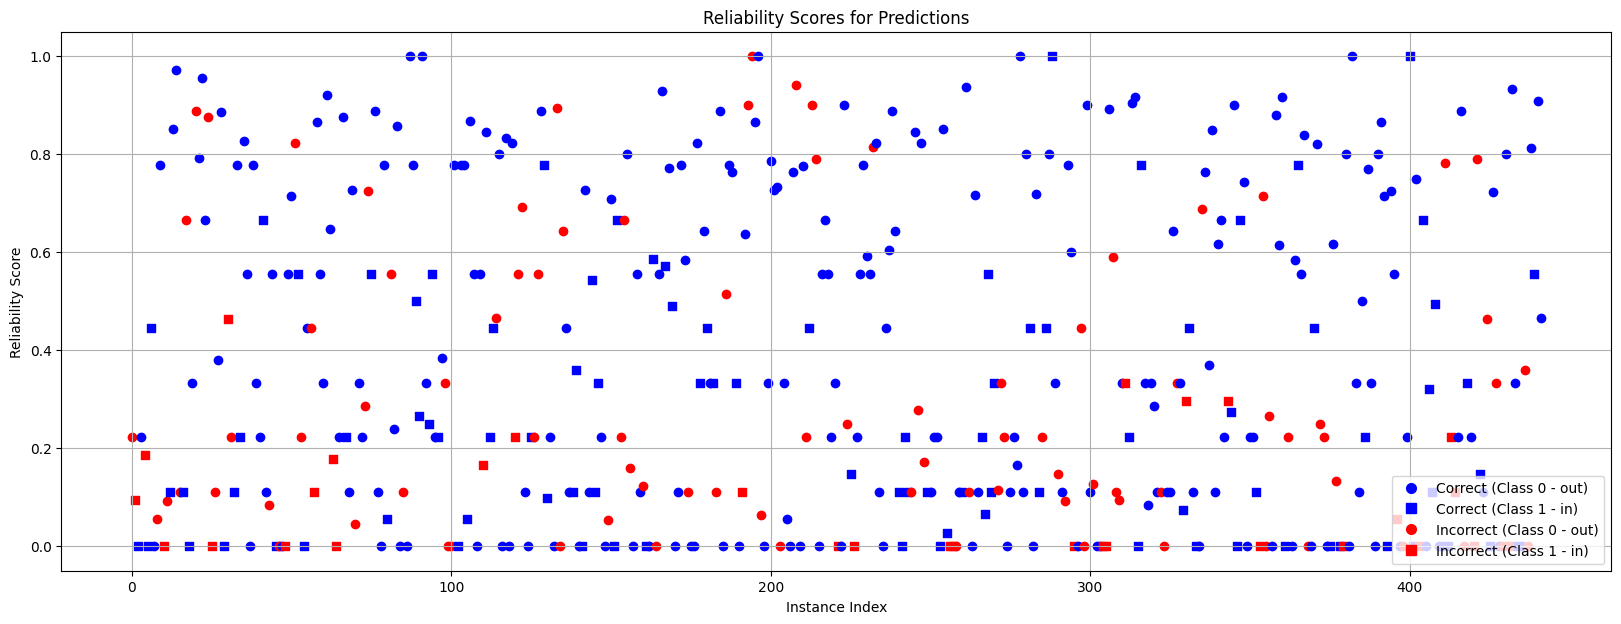

In [5]:
###########################################################
# Results
###########################################################
visualizer = ReliabilityVisualizer(results_df=results_df)

visualizer.plot_reliability_scores((20,7))

In [6]:
reliability_table_df = visualizer.get_reliability_table_5()
print(reliability_table_df)

     Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0   [0.00, 0.05]           46             16           24             16
1   ]0.05, 0.10]            2              7            5              2
2   ]0.10, 0.15]           23             14           15              3
3   ]0.15, 0.20]            1              2            0              3
4   ]0.20, 0.25]           19             12           10              2
5   ]0.25, 0.30]            1              3            2              2
6   ]0.30, 0.35]           17              4            7              1
7   ]0.35, 0.40]            3              1            1              0
8   ]0.40, 0.45]            3              2            8              0
9   ]0.45, 0.50]            2              2            3              1
10  ]0.50, 0.55]            0              1            1              0
11  ]0.55, 0.60]           18              4            7              0
12  ]0.60, 0.65]            9              1       

In [7]:
# high_reliability_cases = results_df[results_df['reliability_score'] > 0.95]
# print(f"Number of cases where reliability is higher than 0.9: {len(high_reliability_cases)}")
# print(high_reliability_cases)

### 10

In [8]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]           48             23           29             18
1  ]0.10, 0.20]           24             16           15              6
2  ]0.20, 0.30]           20             15           12              4
3  ]0.30, 0.40]           20              5            8              1
4  ]0.40, 0.50]            5              4           11              1
5  ]0.50, 0.60]           18              5            8              0
6  ]0.60, 0.70]           12              5            4              0
7  ]0.70, 0.80]           40              5            3              0
8  ]0.80, 0.90]           31              7            0              0
9  ]0.90, 1.00]           15              2            2              0


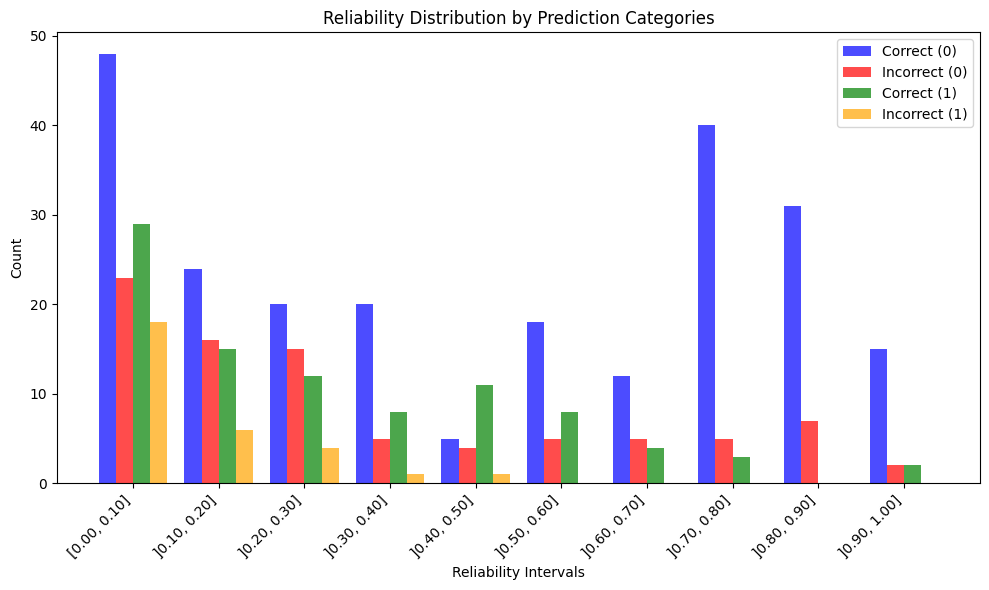

In [9]:
visualizer.plot_table_graph(reliability_table_10_df)

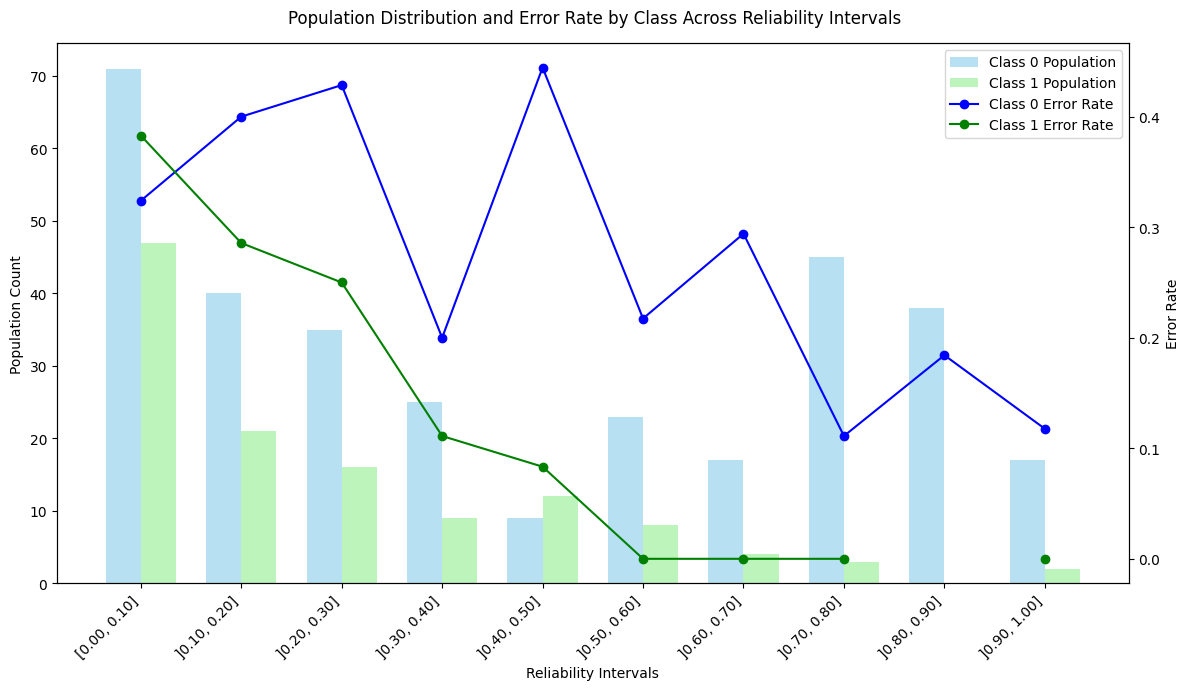

In [10]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)

Sample reliability interval assignment:
   reliability_score reliability_interval
0           0.222222           (0.2, 0.3]
1           0.095238        (-0.001, 0.1]
2           0.000000        (-0.001, 0.1]
3           0.222222           (0.2, 0.3]
4           0.185185           (0.1, 0.2]
5           0.000000        (-0.001, 0.1]
6           0.444444           (0.4, 0.5]
7           0.000000        (-0.001, 0.1]
8           0.055556        (-0.001, 0.1]
9           0.777778           (0.7, 0.8]


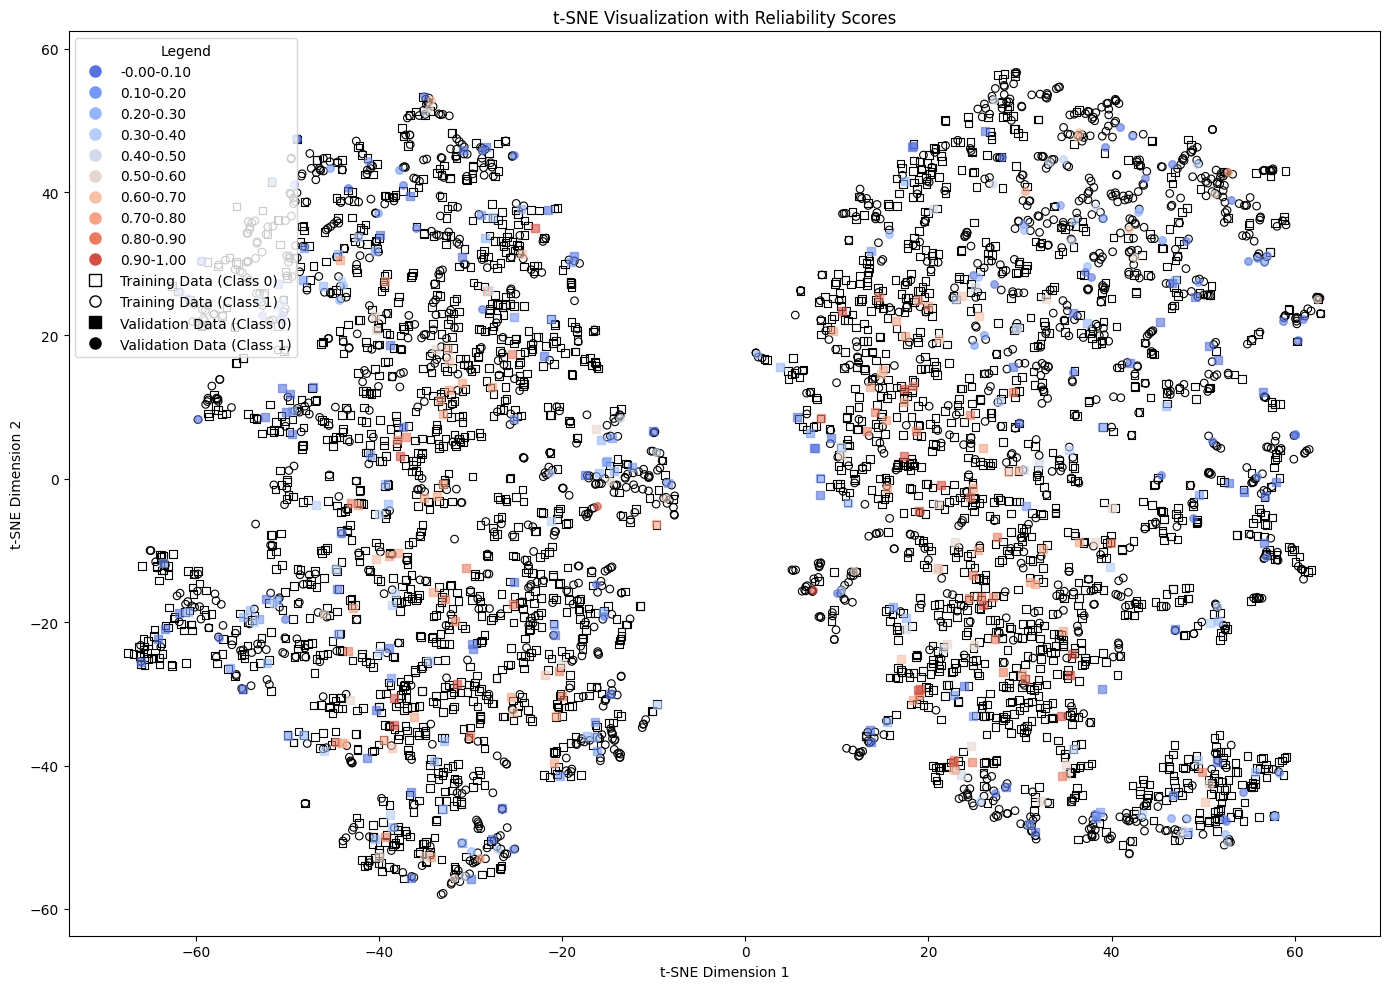

In [11]:
visualizer.plot_tsne_with_reliability(
    X_train_preprocessed, validation_data, y_train, pipeline
)